*<h1 align='center'> Alexnet & Mobilenet models on CIFAR-10 - dataset </h1>*

---

Name: Logesh.V <br>
Email: vlogesh2001@gmail.com <br>

## ALEXNET FOR CIFAR-10 DATASET 

In [1]:
# Importing Packages

import numpy as np # linear algebra
import pandas as pd # data processing(e.g. pd.read_csv)

import tensorflow as tf
tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)

from tensorflow import keras
import matplotlib.pyplot as plt
import os

In [2]:
# Loading the Dataset and getting size of it
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("Size of the train images", x_train.shape)
print("Size of the test images", x_test.shape)

Size of the train images (50000, 32, 32, 3)
Size of the test images (10000, 32, 32, 3)


In [3]:
# Splitting the train and validation data and test data 

x_test, y_test = x_test[:5000], y_test[:5000]
x_val, y_val = x_train[:5000], y_train[:5000]
x_train, y_train = x_train[10000:], y_train[10000:]

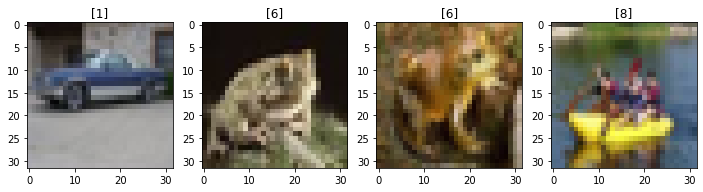

In [4]:
# To Visualize the data 
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

f = plt.figure(figsize=(12, 12))

n = 4
for i in range(n):
    f.add_subplot(1, 4, i+1)
    plt.imshow(x_train[i])
    plt.title(str(y_train[i]) )

In [5]:
# printing the size of all the transformed data

print("Training data size: ", x_train.shape)
print("Validation data size: ", x_val.shape)
print("Test data size: ", x_test.shape)
print("Training data Labels", y_train.shape)
print("Validation data Labels", y_val.shape)

Training data size:  (40000, 32, 32, 3)
Validation data size:  (5000, 32, 32, 3)
Test data size:  (5000, 32, 32, 3)
Training data Labels (40000, 1)
Validation data Labels (5000, 1)


In [6]:
from tensorflow import keras
from keras.utils import np_utils

num_classes = 10

# Convert class vectors to binary class matrices.
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_val = np_utils.to_categorical(y_val, num_classes)


print("Train Labels size : ", y_train.shape)
print("Validation data Labels size: ", y_val.shape)
print("Test Data Labels size: ", y_test.shape)

Train Labels size :  (40000, 10)
Validation data Labels size:  (5000, 10)
Test Data Labels size:  (5000, 10)


In [7]:
# Shuffling the train and validation data
from sklearn.utils import shuffle

x_val, y_val  = shuffle(x_val, y_val)
x_train, y_train = shuffle(x_train, y_train)

In [8]:
import tensorflow.keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras import optimizers
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D,BatchNormalization,LayerNormalization

# Input size of the image Alexnet Model
image_size = (227,227)

model = keras.models.Sequential([
    
    # Resizing pre-processing is done here
    keras.layers.experimental.preprocessing.Resizing(image_size[0], image_size[1], interpolation="bilinear", input_shape=x_train.shape[1:]),
    keras.layers.experimental.preprocessing.Normalization(),
    
    # 1st-Layer
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=image_size),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    
    # 2nd-Layer
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(2,2), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    
    # 3rd-Layer
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    
    # FC layer 
    keras.layers.Flatten(),
    
    # DNN
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    
    # Output
    keras.layers.Dense(10, activation='softmax')
])
# Compiling the Model
model.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing (Resizing)          (None, 227, 227, 3)       0         
_________________________________________________________________
normalization (Normalization (None, 227, 227, 3)       7         
_________________________________________________________________
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 256)       1

In [9]:
# Training the model
history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data = (x_val, y_val),validation_freq=1)

Epoch 1/20
625/625 [==============================] - 39s 57ms/step - loss: 1.8797 - accuracy: 0.3742 - val_loss: 1.4403 - val_accuracy: 0.4736
Epoch 2/20
625/625 [==============================] - 36s 58ms/step - loss: 1.2970 - accuracy: 0.5415 - val_loss: 1.4149 - val_accuracy: 0.5202
Epoch 3/20
625/625 [==============================] - 36s 58ms/step - loss: 1.0533 - accuracy: 0.6324 - val_loss: 1.1496 - val_accuracy: 0.6050
Epoch 4/20
625/625 [==============================] - 36s 58ms/step - loss: 0.8751 - accuracy: 0.6981 - val_loss: 1.3723 - val_accuracy: 0.5450
Epoch 5/20
625/625 [==============================] - 37s 59ms/step - loss: 0.7922 - accuracy: 0.7297 - val_loss: 0.7548 - val_accuracy: 0.7428
Epoch 6/20
625/625 [==============================] - 37s 59ms/step - loss: 0.6492 - accuracy: 0.7796 - val_loss: 0.7922 - val_accuracy: 0.7304
Epoch 7/20
625/625 [==============================] - 37s 60ms/step - loss: 0.5447 - accuracy: 0.8132 - val_loss: 0.7049 - val_accuracy:

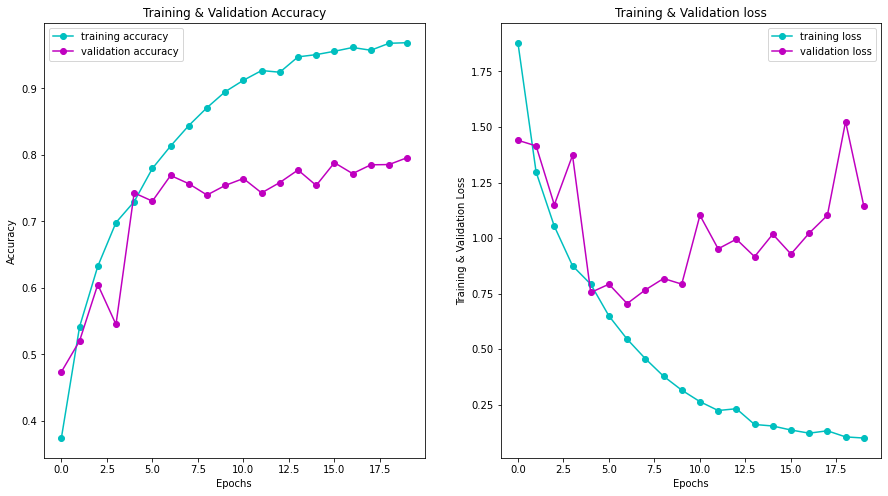

In [16]:
def plot_accuracy_and_loss_of_train_and_validation_dataset(history):
    epoch=[i for i in range(20)]
    train_acc=history.history['accuracy']
    train_loss=history.history['loss']
    val_acc=history.history['val_accuracy']
    val_loss=history.history['val_loss']
    fig , ax=plt.subplots(1,2)
    fig.set_size_inches(15,8)
    ax[0].plot(epoch,train_acc,'co-',label='training accuracy')
    ax[0].plot(epoch,val_acc,'mo-',label='validation accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    ax[1].plot(epoch,train_loss,'c-o',label='training loss')
    ax[1].plot(epoch,val_loss,'m-o',label='validation loss')
    ax[1].set_title('Training & Validation loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Training & Validation Loss")

plot_accuracy_and_loss_of_train_and_validation_dataset(history)

In [17]:
# Printing the Accuracy and the Loss for the Test data

loss,accuracy = model.evaluate(x_test,y_test)
print("Accuracy for test data : ",accuracy)
print("Loss for test data : ",loss)

157/157 [==============================] - 2s 12ms/step - loss: 1.0741 - accuracy: 0.7908
Accuracy for test data :  0.7907999753952026
Loss for test data :  1.0741267204284668


In [18]:
# For the Confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import multilabel_confusion_matrix

rounded_labels = np.argmax(y_test, axis=1)

preds = model.predict(x_test, batch_size = 64, verbose = 1)
preds = np.argmax(preds, axis=1) # to get the indices of max value in each row
cr = confusion_matrix(rounded_labels, preds)


79/79 [==============================] - 1s 15ms/step


In [19]:
# Printing the Classification Report
print(classification_report(rounded_labels, preds))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       488
           1       0.90      0.88      0.89       505
           2       0.76      0.73      0.74       512
           3       0.63      0.63      0.63       497
           4       0.79      0.76      0.78       507
           5       0.65      0.74      0.69       488
           6       0.81      0.86      0.83       491
           7       0.94      0.76      0.84       495
           8       0.82      0.90      0.86       504
           9       0.85      0.85      0.85       513

    accuracy                           0.79      5000
   macro avg       0.80      0.79      0.79      5000
weighted avg       0.80      0.79      0.79      5000



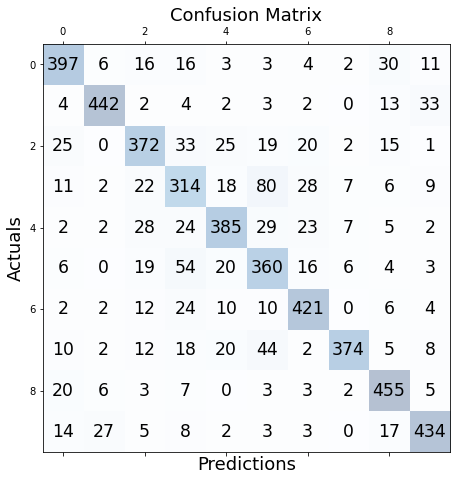

In [20]:
# Visualizing the Confusion Matrix

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cr, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cr.shape[0]):
    for j in range(cr.shape[1]):
        ax.text(x=j, y=i,s=cr[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)    
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [21]:
# Class-wise Precision
acc={}
l=len(cr)
for i in range(0,l):
    acc[i]=cr[i][i]/sum(cr[:, i])
print("Precision: \n",acc)
#here we can see most of the class 1 is classified correctly than other classes

Precision: 
 {0: 0.8085539714867617, 1: 0.9038854805725971, 2: 0.7576374745417516, 3: 0.6254980079681275, 4: 0.7938144329896907, 5: 0.6498194945848376, 6: 0.8065134099616859, 7: 0.935, 8: 0.8183453237410072, 9: 0.8509803921568627}


In [22]:
# Recall
Recall ={}    
for i in range(0,l):
     Recall[i]= cr[i][i]/sum(cr[i,:])
print("Recall: \n",Recall)

Recall: 
 {0: 0.8135245901639344, 1: 0.8752475247524752, 2: 0.7265625, 3: 0.6317907444668008, 4: 0.7593688362919132, 5: 0.7377049180327869, 6: 0.8574338085539714, 7: 0.7555555555555555, 8: 0.9027777777777778, 9: 0.8460038986354775}


In [23]:
f1 ={}    
for i in range(0,l):
     f1[i] = 2 * (cr[i,i] / sum(cr[:,i])) * (cr[i,i]/sum(cr[i,:])) / ((cr[i,i] / sum(cr[:,i])) + (cr[i,i]/sum(cr[i,:])))
print("F1- score: \n",f1)

F1- score: 
 {0: 0.8110316649642492, 1: 0.8893360160965795, 2: 0.7417746759720837, 3: 0.6286286286286286, 4: 0.7762096774193548, 5: 0.690978886756238, 6: 0.8311944718657452, 7: 0.8357541899441341, 8: 0.858490566037736, 9: 0.8484848484848485}


## MOBILENET FOR CIFAR-10 DATASET 

In [1]:
# Importing Packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os

In [2]:
# Loading the Dataset and getting size of it
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("Size of the train images", x_train.shape)
print("Size of the test images", x_test.shape)

Size of the train images (50000, 32, 32, 3)
Size of the test images (10000, 32, 32, 3)


In [3]:
x_test, y_test = x_test[:5000], y_test[:5000]
x_val, y_val = x_train[:5000], y_train[:5000]
x_train, y_train = x_train[30000:], y_train[30000:]

In [4]:
print("Training data size: ", x_train.shape)
print("Validation data size: ", x_val.shape)
print("Test data size: ", x_test.shape)
print("Training data Labels", y_train.shape)
print("Validation data Labels", y_val.shape)

Training data size:  (20000, 32, 32, 3)
Validation data size:  (5000, 32, 32, 3)
Test data size:  (5000, 32, 32, 3)
Training data Labels (20000, 1)
Validation data Labels (5000, 1)


In [5]:
from keras.utils import np_utils

num_classes = 10

# Convert class vectors to binary class matrices.
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_val = np_utils.to_categorical(y_val, num_classes)

In [6]:
from sklearn.utils import shuffle

x_val, y_val  = shuffle(x_val, y_val)
x_train, y_train = shuffle(x_train, y_train)

In [7]:
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications.mobilenet import MobileNet

import tensorflow.keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras import optimizers
from keras.layers import Resizing
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D,BatchNormalization,LayerNormalization

In [8]:
mobnet_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

In [9]:
image_size = (224,224)

from keras import layers
from keras import models

num_classes = 10

model1 = Sequential([
    keras.layers.experimental.preprocessing.Resizing(image_size[0], image_size[1], interpolation="bilinear", input_shape=x_train.shape[1:]),
    keras.layers.experimental.preprocessing.Normalization()
])
model1.add(mobnet_model) 
model1.add(GlobalAveragePooling2D())

model1.add(Dense(1024,activation=('relu')))
model1.add(Dense(512,activation=('relu'))) 
model1.add(Dense(256,activation=('relu'))) 
model1.add(Dropout(0.5))
model1.add(Dense(128,activation=('relu')))
model1.add(Dropout(0.5))
model1.add(Dense(10,activation=('softmax')))


model1.compile(loss='categorical_crossentropy',
              optimizer= 'Adam',
              metrics=['acc'])
# a summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing (Resizing)          (None, 224, 224, 3)       0         
_________________________________________________________________
normalization (Normalization (None, 224, 224, 3)       7         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, None, None, 1024)  3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               1

In [10]:
# Creating the model and compiling it
model1.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
# training the model 
history = model1.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_data = (x_test, y_test),validation_freq=1)

Epoch 1/10
625/625 [==============================] - 130s 199ms/step - loss: 1.2009 - accuracy: 0.6130 - val_loss: 1.0940 - val_accuracy: 0.6618
Epoch 2/10
625/625 [==============================] - 126s 202ms/step - loss: 0.7790 - accuracy: 0.7739 - val_loss: 0.6959 - val_accuracy: 0.7908
Epoch 3/10
625/625 [==============================] - 129s 206ms/step - loss: 0.5986 - accuracy: 0.8271 - val_loss: 0.6796 - val_accuracy: 0.7912
Epoch 4/10
625/625 [==============================] - 128s 205ms/step - loss: 0.5086 - accuracy: 0.8587 - val_loss: 0.5784 - val_accuracy: 0.8274
Epoch 5/10
625/625 [==============================] - 128s 205ms/step - loss: 0.4197 - accuracy: 0.8771 - val_loss: 0.5062 - val_accuracy: 0.8418
Epoch 6/10
625/625 [==============================] - 128s 205ms/step - loss: 0.3802 - accuracy: 0.8901 - val_loss: 0.5251 - val_accuracy: 0.8506
Epoch 7/10
625/625 [==============================] - 128s 205ms/step - loss: 0.3280 - accuracy: 0.9054 - val_loss: 0.6324 -

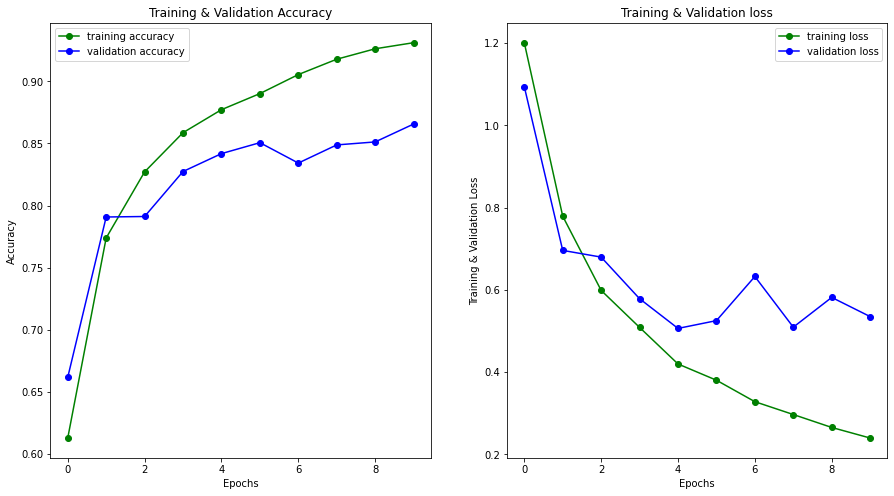

In [12]:
def plot_accuracy_and_loss_of_train_and_validation_dataset(history):
    epoch=[i for i in range(10)]
    train_acc=history.history['accuracy']
    train_loss=history.history['loss']
    val_acc=history.history['val_accuracy']
    val_loss=history.history['val_loss']
    fig , ax=plt.subplots(1,2)
    fig.set_size_inches(15,8)
    ax[0].plot(epoch,train_acc,'go-',label='training accuracy')
    ax[0].plot(epoch,val_acc,'bo-',label='validation accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    ax[1].plot(epoch,train_loss,'g-o',label='training loss')
    ax[1].plot(epoch,val_loss,'b-o',label='validation loss')
    ax[1].set_title('Training & Validation loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Training & Validation Loss")

plot_accuracy_and_loss_of_train_and_validation_dataset(history)

In [13]:
loss,accuracy = model1.evaluate(x_test,y_test)
print("Accuracy for test data : ",accuracy)
print("Loss for test data : ",loss)

157/157 [==============================] - 6s 37ms/step - loss: 0.5349 - accuracy: 0.8656
Accuracy for test data :  0.8655999898910522
Loss for test data :  0.5349146723747253


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import multilabel_confusion_matrix

rounded_labels=np.argmax(y_test, axis=1)

preds = model1.predict(x_test, batch_size = 64, verbose = 1)
preds = np.argmax(preds, axis=1) # to get the indices of max value in each row
cr = confusion_matrix(rounded_labels, preds)

79/79 [==============================] - 5s 61ms/step


In [21]:
print(classification_report(rounded_labels, preds))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       488
           1       0.95      0.93      0.94       505
           2       0.83      0.80      0.82       512
           3       0.86      0.63      0.73       497
           4       0.78      0.91      0.84       507
           5       0.87      0.79      0.83       488
           6       0.79      0.95      0.87       491
           7       0.88      0.93      0.90       495
           8       0.96      0.89      0.93       504
           9       0.94      0.92      0.93       513

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.86      5000
weighted avg       0.87      0.87      0.86      5000



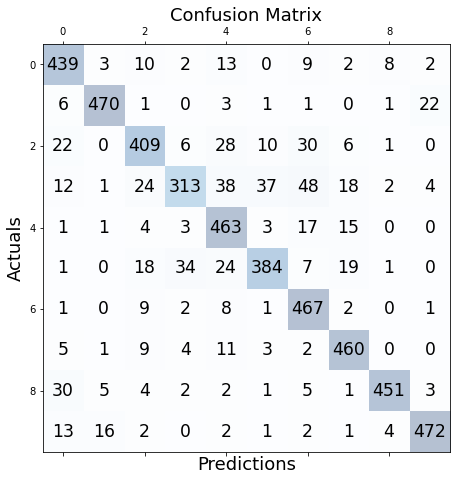

In [22]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cr, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cr.shape[0]):
    for j in range(cr.shape[1]):
        ax.text(x=j, y=i,s=cr[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)    
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [23]:
# Class-wise Precision
acc={}
l=len(cr)
for i in range(0,l):
    acc[i]=cr[i][i]/sum(cr[:, i])
print("Precision: \n",acc)
#here we can see most of the class 1 is classified correctly than other classes

Precision: 
 {0: 0.8283018867924529, 1: 0.9456740442655935, 2: 0.8346938775510204, 3: 0.855191256830601, 4: 0.7820945945945946, 5: 0.8707482993197279, 6: 0.79421768707483, 7: 0.8778625954198473, 8: 0.9636752136752137, 9: 0.9365079365079365}


In [24]:
# Recall
Recall ={}    
for i in range(0,l):
     Recall[i]= cr[i][i]/sum(cr[i,:])
print("Recall: \n",Recall)

Recall: 
 {0: 0.8995901639344263, 1: 0.9306930693069307, 2: 0.798828125, 3: 0.6297786720321932, 4: 0.9132149901380671, 5: 0.7868852459016393, 6: 0.9511201629327902, 7: 0.9292929292929293, 8: 0.8948412698412699, 9: 0.9200779727095516}


In [25]:
f1 ={}    
for i in range(0,l):
     f1[i] = 2 * (cr[i,i] / sum(cr[:,i])) * (cr[i,i]/sum(cr[i,:])) / ((cr[i,i] / sum(cr[:,i])) + (cr[i,i]/sum(cr[i,:])))
print("F1- score: \n",f1)

F1- score: 
 {0: 0.862475442043222, 1: 0.9381237524950099, 2: 0.8163672654690618, 3: 0.7253765932792584, 4: 0.8425841674249317, 5: 0.8266953713670613, 6: 0.865616311399444, 7: 0.9028459273797841, 8: 0.9279835390946501, 9: 0.9282202556538839}


---
_*<h2 align='center'> Thanking You </h2>*_

---